In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
dfr= pd.read_csv('winequality-red.csv', sep=';')

In [8]:
dfw=pd.read_csv('winequality-white.csv',sep=';')

In [14]:
dfr['label']='red'
dfw['label']='white'

In [17]:
df=pd.concat([dfr,dfw])
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [22]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


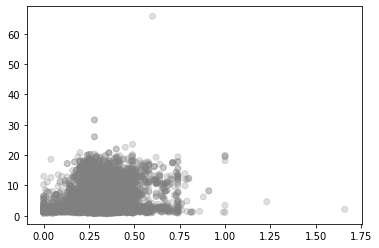

In [39]:
import matplotlib.colors as cl
cMap=cl.ListedColormap('Gray','Red');
plt.scatter(df['citric acid'],df['residual sugar'], c=df['label'].factorize()[0], cmap=cMap, alpha=0.25)

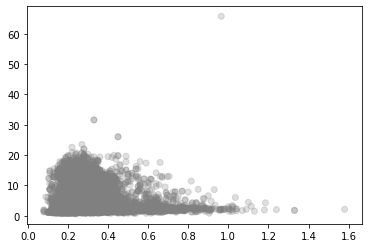

In [40]:
plt.scatter(df['volatile acidity'], df['residual sugar'], c=df['label'].factorize()[0], cmap=cMap, alpha=0.25)

In [45]:
x=df.iloc[:,:12]
y=df['label']

In [48]:
from sklearn.cluster import KMeans

In [49]:
model=KMeans(n_clusters=2)

In [50]:
model.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [54]:
print(model.cluster_centers_)

[[7.61753270e+00 4.07887946e-01 2.91205373e-01 3.08405797e+00
  6.56726759e-02 1.84515730e+01 6.36139979e+01 9.94565716e-01
  3.25525274e+00 5.71785083e-01 1.07956816e+01 5.80982679e+00]
 [6.90508451e+00 2.87048800e-01 3.39787350e-01 7.26278626e+00
  4.85997819e-02 3.98373773e+01 1.55951063e+02 9.94797606e-01
  3.19015540e+00 5.00019084e-01 1.02574282e+01 5.82497274e+00]]


In [55]:
ypred=model.predict(x)

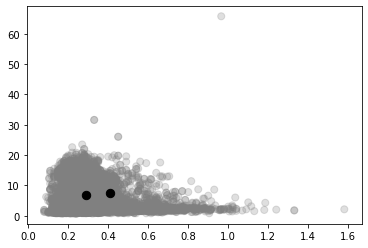

In [62]:
plt.scatter(df['volatile acidity'], df['residual sugar'], c=ypred, s=50,cmap=cMap, alpha=0.25)
centers=model.cluster_centers_
plt.scatter(centers[:,1], centers[:,0], c='black', s=70)

In [67]:
from sklearn.metrics import confusion_matrix

ytest=y.factorize()[0]
mat=confusion_matrix(ytest,ypred)

AxesSubplot(0.125,0.211875;0.775x0.58125)


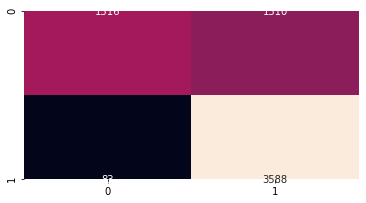

In [70]:
from seaborn import heatmap
print(heatmap(mat.T,annot=True,fmt='d',cbar=False,square=True))

In [81]:
a=pd.DataFrame((ytest,ypred))
a=a.T
a.columns=['actual','predicted']

In [82]:
a.to_csv('outcome.csv')